In [1]:
from src.classes.network import Network
from src.classes.node import Node
from multiprocessing import Pool
from src.viusalization import plot_cascade_dist, plot_cascade_dist_average, plot_network, plot_cascade, merging_gif, create_animation, create_holy_grale
from collections import defaultdict
from concurrent.futures import ProcessPoolExecutor
from functools import partial
import os, sys
import numpy as np
from src.experimentation import generate_networks
import copy

#### Global Values

In [3]:
correlations = np.linspace(-1, 1, 11)
correlations = np.round(correlations, 1)
initial_seeds = np.linspace(13, 1600, 11)
num_runs = 30
num_nodes = 200
update_fraction = 0.1
average_degree = 8
starting_distribution = 0.5     # L / R ratio (niet per se nodig maar kan misschien leuk zijn om te varieern)
p = average_degree/(num_nodes-1) 
updates = 300000


A Wattz-Strogatz network is initialized with beta value 0.01 and regular network degree 2, and correlation -1
[[], [13, 14, 9, 4, 28, 23, 24, 27, 22], [22, 23, 24, 27, 28], [25], []]
()
[[], [11, 4, 2, 25, 17, 28, 23, 24, 27], [24, 4, 28, 23], [16], [22], []]
(19, 20)


MovieWriter ffmpeg unavailable; using Pillow instead.


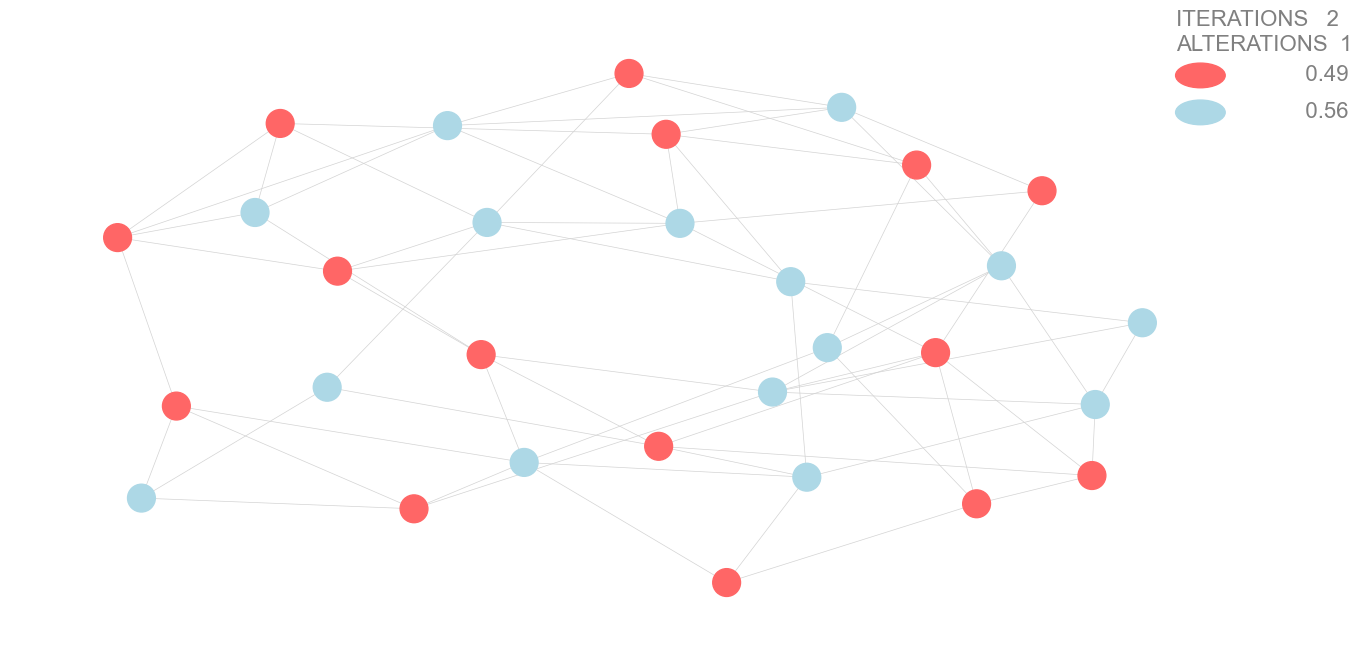

[[], [14, 11, 5, 16, 29, 19, 26, 15, 27], [16, 26, 19, 29], [3, 4, 12, 22], []]
()
[[], [6, 1, 21, 17, 23, 29, 24, 19, 20], [1], []]
()
[[], [8, 3, 14, 6, 1, 4, 21, 24, 26], [1, 3, 4, 8, 14, 26], [16, 22], [2, 10, 11, 18, 19], [7, 12], []]
()
[[], [11, 3, 25, 16, 17, 23, 29, 20, 27], [3, 16, 11], [22], [4, 7], []]
()


MovieWriter ffmpeg unavailable; using Pillow instead.


Processing frame 0
Processing frame 0
Processing frame 0
Processing frame 0
Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 11
Processing frame 12
Processing frame 13
Processing frame 14
Processing frame 15
Processing frame 16
Processing frame 17
Processing frame 18
Processing frame 19
Processing frame 20
Processing frame 21
Processing frame 22
Processing frame 23
Processing frame 24
Processing frame 25
Processing frame 26
Processing frame 27
Processing frame 28
Processing frame 29
Processing frame 30
Processing frame 31
Processing frame 32
Processing frame 33
Processing frame 34
Processing frame 35
Processing frame 36
Processing frame 37
Processing frame 38
Processing frame 39
Processing frame 40
Processing frame 41
Processing frame 42
Processing frame 43
Processing frame 44
Processing frame 45
Processing frame 46
Processing fr

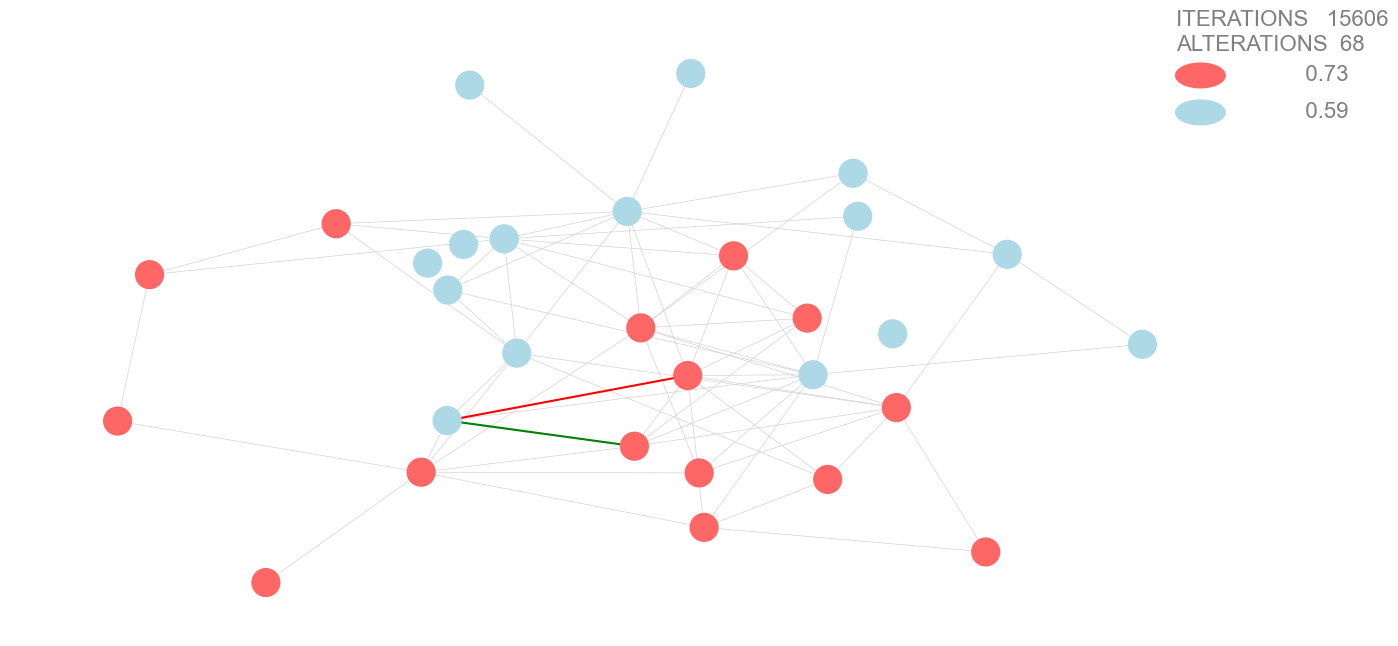

In [2]:
network = ""
num_nodes = 30
mean = 0
correlation = -1
starting_distribution = 0.5
update_fraction = 0.3
seed = None
p = 0.01
k = 2
m = 2 

# def __init__(self, network, num_nodes, mean=0, correlation=-1, starting_distribution=0.5, update_fraction=0.2, seed=None, p=0.1, k=None, m=2):
network = Network(network, num_nodes, mean, correlation, starting_distribution, update_fraction, seed, p, k, m)

cascade_amount = 6
create_animation(network, cascade_amount)
create_holy_grale(network, cascade_amount)
# simulate for some iteration to create a nicer structure
# for _ in range(100):
#     network.update_round()

# # plot_network(network)
# old_network_connections, connections, length_left, length_right = plot_cascade(network, 1)

# connections2, length_left, length_right = plot_cascade(network, 2)

MovieWriter ffmpeg unavailable; using Pillow instead.


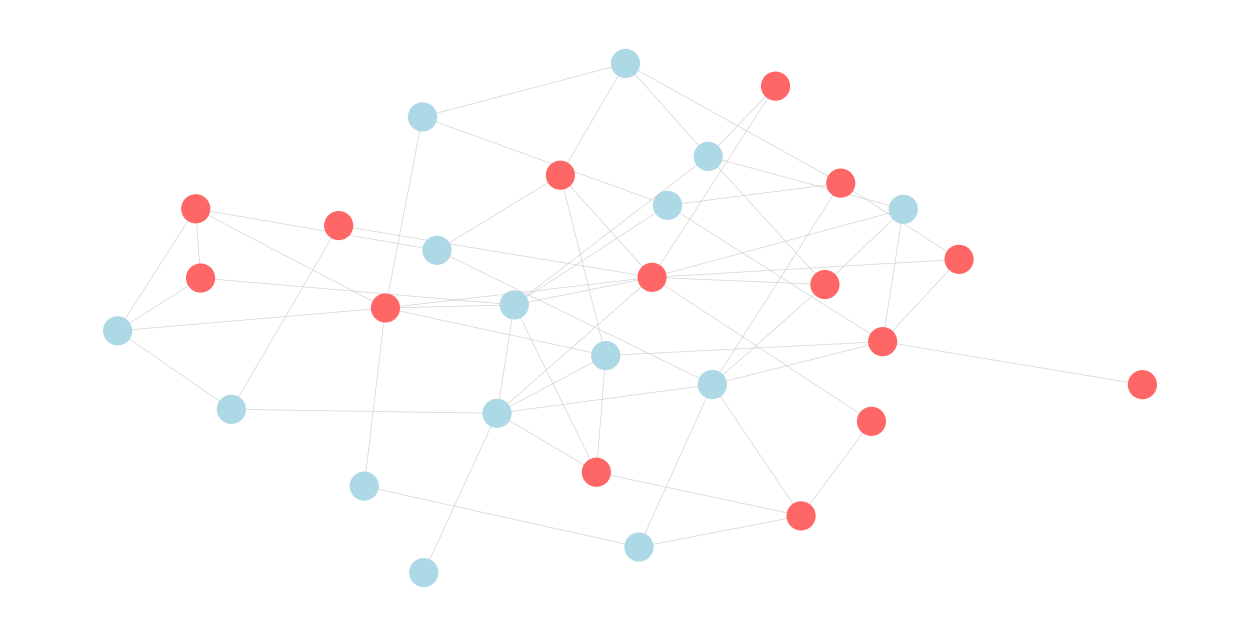

In [11]:

merging_gif(old_network_connections, connections, length_left, length_right)

In [13]:
from PIL import Image, ImageSequence

def merge_gifs(gif1_path, gif2_path, output_path):
    # Open the first GIF
    gif1 = Image.open(gif1_path)
    frames1 = [frame.copy() for frame in ImageSequence.Iterator(gif1)]
    durations1 = [frame.info.get("duration", 100) for frame in ImageSequence.Iterator(gif1)]

    # Open the second GIF
    gif2 = Image.open(gif2_path)
    frames2 = [frame.copy() for frame in ImageSequence.Iterator(gif2)]
    durations2 = [frame.info.get("duration", 100) for frame in ImageSequence.Iterator(gif2)]

    # Combine frames and durations
    merged_frames = frames1 + frames2
    merged_durations = durations1 + durations2

    # Save the merged GIF with correct durations
    merged_frames[0].save(
        output_path,
        save_all=True,
        append_images=merged_frames[1:],
        duration=merged_durations,  # Use individual durations
        loop=0  # Infinite loop
    )

# Paths to GIFs
gif1_path = "animations/test1.gif"
gif2_path = "animations/merge.gif"
output_path = "animations/merged_output.gif"

# Merge the GIFs
merge_gifs(gif1_path, gif2_path, output_path)

print(f"Merged GIF saved at {output_path}")



Merged GIF saved at animations/merged_output.gif


#### Setting seed for fixed order for sets, for reproducability purposes

In [15]:
# %env PYTHONHASHSEED=134

In [16]:
# def multiple_correlations(corr, start_seed = 39):

#     num_nodes = 200
#     correlation = corr
#     update_fraction = 0.1
#     average_degree = 8
#     starting_distribution = 0.5     # L / R ratio (niet per se nodig maar kan misschien leuk zijn om te varieern)

#     # average degree of 8
#     p = average_degree/(num_nodes-1)
#     seedje = start_seed
#     number_of_experiments = 10
#     collection_of_all_before = defaultdict(list)
#     collection_of_all_after = defaultdict(list)
#     largest_size_of_all = 0
#     save=True


#     def develop_network(num_nodes, correlation, update_fraction, starting_distribution, seedje, p):
#         network = Network(num_nodes, mean=0, correlation=correlation, update_fraction=update_fraction, starting_distribution=starting_distribution, seed=seedje, p=p)

#         number_of_iters=10000
#         data_before, average_data_before = create_data(number_of_iters, network)
#         largest_size = max(data_before.keys())

#         number_of_alterations = 0

        
#         for _ in range(1000000):
#             network.update_round()
#             number_of_alterations += network.alterations
#         print(number_of_alterations)

#         after_data, average_after_data = create_data(number_of_iters, network)
#         if max(after_data.keys()) > largest_size:
#             largest_size = max(after_data.keys())
#         return (data_before, average_data_before), (after_data, average_after_data), largest_size

#     for i in range(number_of_experiments):

#         seedje +=i
#         (before_data, averaged_before_data), (after_data, averaged_after_data), largest_size=develop_network(num_nodes, correlation, update_fraction, starting_distribution, seedje, p)
#         if largest_size > largest_size_of_all:
#             largest_size_of_all = largest_size
#         for size, polarizations in before_data.items():
#             collection_of_all_before[size].extend(polarizations)

#         for size, polarizations in after_data.items():
#             collection_of_all_after[size].extend(polarizations)
        

#     plot_cascade_dist_average(collection_of_all_before, "before", largest_size_of_all, number_of_experiments, save, correlation)
#     plot_cascade_dist_average(collection_of_all_after, "after", largest_size_of_all, number_of_experiments, save, correlation)

#### Developing and saving network

In [20]:

# dummy values
num_runs = 10
updates=10000

generate_networks(correlations, initial_seeds, num_nodes=num_nodes, iterations=updates, how_many=num_runs, update_fraction=update_fraction, starting_distribution=starting_distribution, p=p)

 #### Reading in and generating Network

In [21]:
def read_network_properties(file_path):
    """
    Reads network properties from a .txt file and converts them back
    into a dictionary with appropriate datatypes.

    Args:
        file_path (str): Path to the .txt file containing network properties.

    Returns:
        dict: Network properties with restored data types.
    """
    properties = {}

    with open(file_path, "r") as file:
        lines = file.readlines()
    
    for line in lines[2:]:  # Skip the header lines
        key, value = line.strip().split(": ", 1)
        if key == "Number of Nodes" or key == "Number of Edges":
            properties[key] = int(value)
        elif key == "Correlation" or key == "P value" or key == "Update fraction":
            properties[key] = float(value)
        elif key == "Seed":
            properties[key] = int(value)
        elif key == "Connections":
            # Parse connections as a list of tuples
            connections = eval(value)  # Use eval to safely parse the list of tuples
            properties[key] = [(int(a), int(b)) for a, b in connections]
        elif key == "Nodes":
            # Parse nodes as a list of tuples
            nodes = eval(value)  # Use eval to safely parse the list of tuples
            properties[key] = [(int(node_id), identity, float(threshold)) for node_id, identity, threshold in nodes]
        else:
            properties[key] = value
    return properties

def read_and_load_networks(num_runs, num_nodes, update_fraction, average_degree, starting_distribution, correlations):
    p = average_degree/(num_nodes-1) 
    networks = defaultdict(tuple)
    for corr in correlations:
        for i in range(num_runs):
            network_properties = read_network_properties(f"networks/random/{corr}/network_{i}.txt")
            seedje = network_properties["Seed"]
            search_nodes = defaultdict(Node)
            before_network = Network("random", num_nodes, mean=0, correlation=corr, update_fraction=update_fraction, starting_distribution=starting_distribution, seed=seedje, p=p)
            after_network = Network("random", num_nodes, mean=0, correlation=corr, update_fraction=update_fraction, starting_distribution=starting_distribution, seed=seedje, p=p)
            after_network.connections = set()

            for nodeje in after_network.all_nodes:
                nodeje.node_connections = set()
                search_nodes[nodeje.ID] = nodeje
                
            for (node1, node2) in network_properties["Connections"]:
                search_nodes[node1].node_connections.add(search_nodes[node2])
                after_network.connections.add((search_nodes[node1], search_nodes[node2]))
            
            networks[(corr, i)] = (before_network, after_network)

    return networks
    

all_networks = read_and_load_networks(num_runs, num_nodes, update_fraction, average_degree, starting_distribution, correlations)


used_seed = int(initial_seeds[0])
test_network = Network("random", num_nodes, mean=0, correlation=-1.0, update_fraction=update_fraction, starting_distribution=starting_distribution, seed=used_seed, p=p)
number_of_alterations = 0

for _ in range(updates):
    test_network.update_round()
    number_of_alterations += test_network.alterations
    test_network.clean_network()
    
assert set([(conn[0].ID, conn[1].ID) for conn in all_networks[(-1.0, 0)][1].connections]) == set([(conn[0].ID, conn[1].ID) for conn in test_network.connections]), "The networks that are generated should be the same"



A random network is initialized with p: 0.04020100502512563 and 200 nodes and correlation -1.0
A random network is initialized with p: 0.04020100502512563 and 200 nodes and correlation -1.0
A random network is initialized with p: 0.04020100502512563 and 200 nodes and correlation -1.0
A random network is initialized with p: 0.04020100502512563 and 200 nodes and correlation -1.0
A random network is initialized with p: 0.04020100502512563 and 200 nodes and correlation -1.0
A random network is initialized with p: 0.04020100502512563 and 200 nodes and correlation -1.0
A random network is initialized with p: 0.04020100502512563 and 200 nodes and correlation -1.0
A random network is initialized with p: 0.04020100502512563 and 200 nodes and correlation -1.0
A random network is initialized with p: 0.04020100502512563 and 200 nodes and correlation -1.0
A random network is initialized with p: 0.04020100502512563 and 200 nodes and correlation -1.0
A random network is initialized with p: 0.04020100

#### Analyzing and plotting the Cascade distributions

In [6]:
def create_data(iters, network):

    all_cascade_sizes = []
    all_polarizations = []
    average_cascade_per_round = []
    average_polarization_per_round = []
    number_of_samplers = 20

    for _ in range(iters): 
        cascades, cascade_dist, cascade_polarization = network.analyze_network()
        average_cascade_per_round.append(sum(cascade_dist)/number_of_samplers)
        average_polarization_per_round.append(sum(cascade_polarization))
        all_cascade_sizes += cascade_dist
        all_polarizations += cascade_polarization

        # plot_network(network, cascades)

    data = defaultdict(list)
    for i, (size, polarization) in enumerate(zip(all_cascade_sizes, all_polarizations), 1):
        data[size].append(polarization)
    for size in data:
        data[size].sort()

    average_data = defaultdict(list)
    for (size, polarization) in zip(average_cascade_per_round, average_polarization_per_round):
        average_data[size].append(polarization) 
    for size in average_data: 
        average_data[size].sort()
        
    return data, average_data
    

In [11]:
def multiple_correlations(corr,all_networks):

    number_of_experiments = 10
    number_of_iters = 10000
    collection_of_all_before = defaultdict(list)
    collection_of_all_after = defaultdict(list)
    largest_size_of_all = 0
    save=False
    
    # return (data_before, average_data_before), (after_data, average_after_data), largest_size

    for i in range(number_of_experiments):

        before_network, after_network = all_networks[(corr, i)]
    
        before_data, average_before_data = create_data(number_of_iters, before_network)
        after_data, average_after_data = create_data(number_of_iters, after_network)

        largest_size = max(before_data.keys())
        if max(after_data.keys()) > largest_size:
            largest_size = max(after_data.keys())

        if largest_size > largest_size_of_all:
            largest_size_of_all = largest_size
        for size, polarizations in before_data.items():
            collection_of_all_before[size].extend(polarizations)

        for size, polarizations in after_data.items():
            collection_of_all_after[size].extend(polarizations)
        
        print(f"finsihed cascade experimentation {i}")
        

    plot_cascade_dist_average(collection_of_all_before, "before", largest_size_of_all, number_of_experiments, save, corr)
    plot_cascade_dist_average(collection_of_all_after, "after", largest_size_of_all, number_of_experiments, save, corr)

    return collection_of_all_before, collection_of_all_after

In [ ]:
cascades_before = defaultdict(lambda: defaultdict(list))
cascades_after = defaultdict(lambda: defaultdict(list))

for corr in correlations: 
    print(f"starting experimentation for correlation: {corr}")
    print("-----------------------------------------------")
    # initial_seed = int(initial_seeds[i])
    cs_before, cs_after = multiple_correlations(corr,all_networks)
    cascades_before[corr] = cs_before
    cascades_after[corr] = cs_after
